In [373]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [301]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [303]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [305]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [307]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
35,5.0,3.2,1.2,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
56,6.3,3.3,4.7,1.6,versicolor
81,5.5,2.4,3.7,1.0,versicolor
145,6.7,3.0,5.2,2.3,virginica
79,5.7,2.6,3.5,1.0,versicolor
116,6.5,3.0,5.5,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
97,6.2,2.9,4.3,1.3,versicolor
47,4.6,3.2,1.4,0.2,setosa


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [311]:
df.shape

(150, 5)

In [313]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [315]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [317]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [319]:
df.isnull().sum().sum()

0

In [321]:
df.duplicated().sum()

1

In [323]:
df.drop_duplicates(inplace=True)

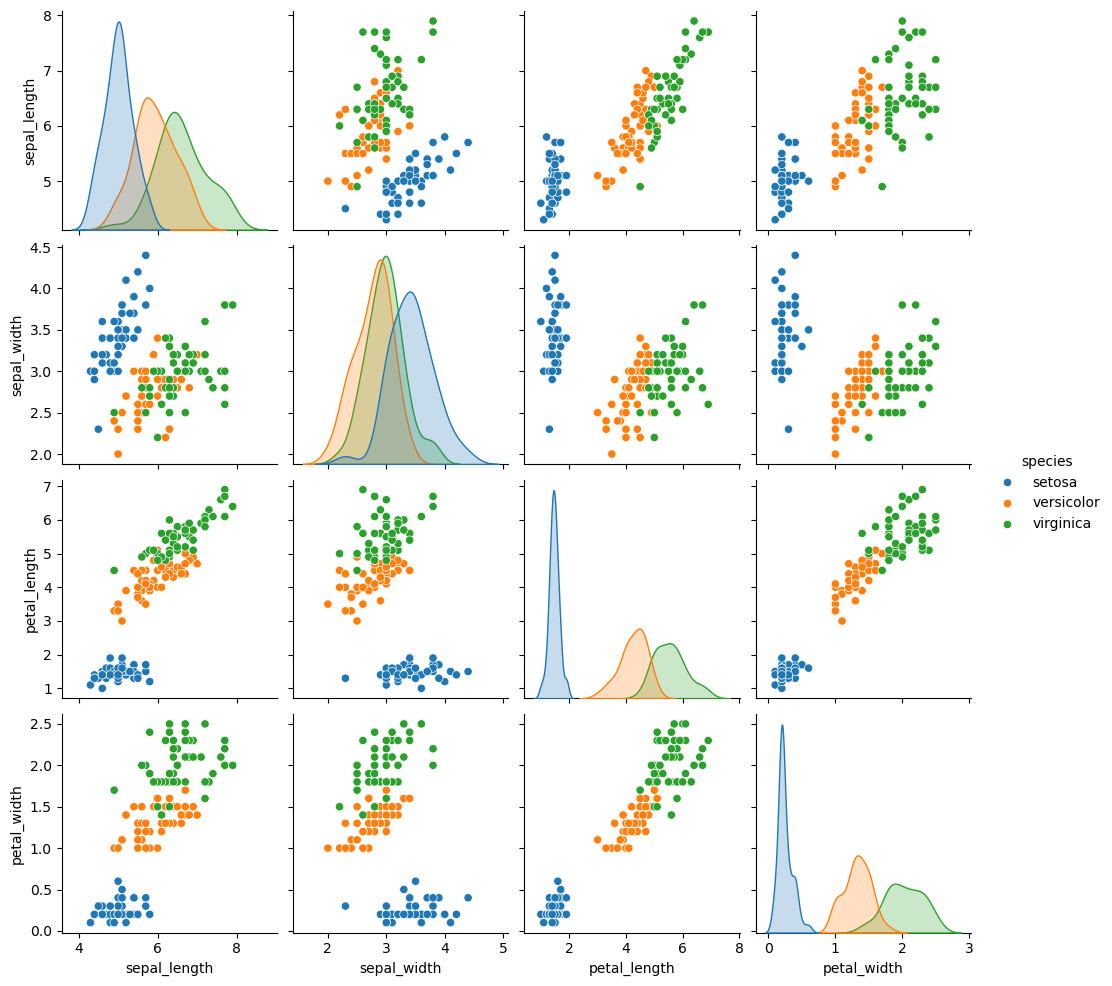

In [325]:
sns.pairplot(df, hue= "species")

<Axes: xlabel='sepal_length', ylabel='petal_length'>

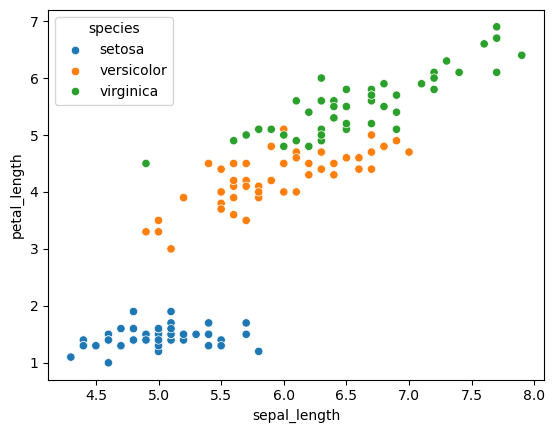

In [326]:
sns.scatterplot(x = df.sepal_length, y = df.petal_length, hue=df.species)

In [327]:
label_encoder = LabelEncoder()
df.species = label_encoder.fit_transform(df.species)


In [328]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [329]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [330]:
x=df[["sepal_length","sepal_width","petal_length","petal_width"]]

In [331]:
#another method to take first 4 columns
df.iloc[:,:4]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [332]:
y=df["species"]

In [333]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [334]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int32

In [335]:
x_train, x_test , y_train, y_test=train_test_split(x,y,test_size=.2)

In [336]:
objRF=RandomForestClassifier(n_estimators=30,max_depth=4, random_state=42)

In [337]:
objRF.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=30, random_state=42)

In [338]:
ypred=objRF.predict(x_test)

In [339]:
objRF.score(x_test,y_test)

0.9333333333333333

In [340]:
confusion_matrix(y_test,ypred)

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]], dtype=int64)

In [341]:
df.species.unique()

array([0, 1, 2])

In [389]:
accuracy_score(y_test,ypred)

0.9333333333333333

In [375]:
objSvc=SVC()

In [377]:
objSvc.fit(x_train,y_train)

SVC()

In [381]:
ypredsvc=objSvc.predict(x_test)

In [383]:
ypredsvc

array([2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 2, 0, 1])

In [385]:
objSvc.score(x_test,y_test)

0.9333333333333333

In [393]:
accuracy_score(y_test,ypredsvc)

0.9333333333333333

In [395]:
confusion_matrix(y_test,ypredsvc)

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]], dtype=int64)

In [397]:
print(classification_report(y_test,ypredsvc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [1]:
pd.read_csv(r"C:\Users\zubai\Downloads\salaries (1).csv")

NameError: name 'pd' is not defined

In [ ]:
knn is disance based algorithm which distance of data from the training point to classify it

better with smaller dataset
highly affected by outliersmand noise
steps in KNN 
1. load the data 
2. Calculate the distance b/w test data with each samples of training data
3. sort the distance in ascending order 
4. vote for the classes based on k value 
5. o/p will be decided based on class having highest votes

techniques to calculate the distance 
euclidean distance D = sqrt (Xi-Yi)^2
Manhattan distance D= |Xi-Yi|
Minkowski Distance D = sqrt((|Xi-Yi|^p)

recommendation to avoid tie 
for even no of classes consider K to be odd
for odd no of classes consider K to be even 

there is no set rule for choosing the k value

we can avoid choosing very large number and very smakk number 

we can choose